In [24]:
# 인터랙티브 애니메이션의 일괄적 종료를 위한 코드: 서로 다른 코드셀의 인터랙티브셀간에 간섭이 일어나서 가급적 아예 독립적인 노트북에서 실행할 것.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 'fig'는 이전에 plt.subplots()로 생성한 Figure 객체입니다.
# plt.close(fig)

# 만약 열려있는 모든 Figure를 닫고 싶다면:
plt.close('all')

#### 1. Newtonian Motion

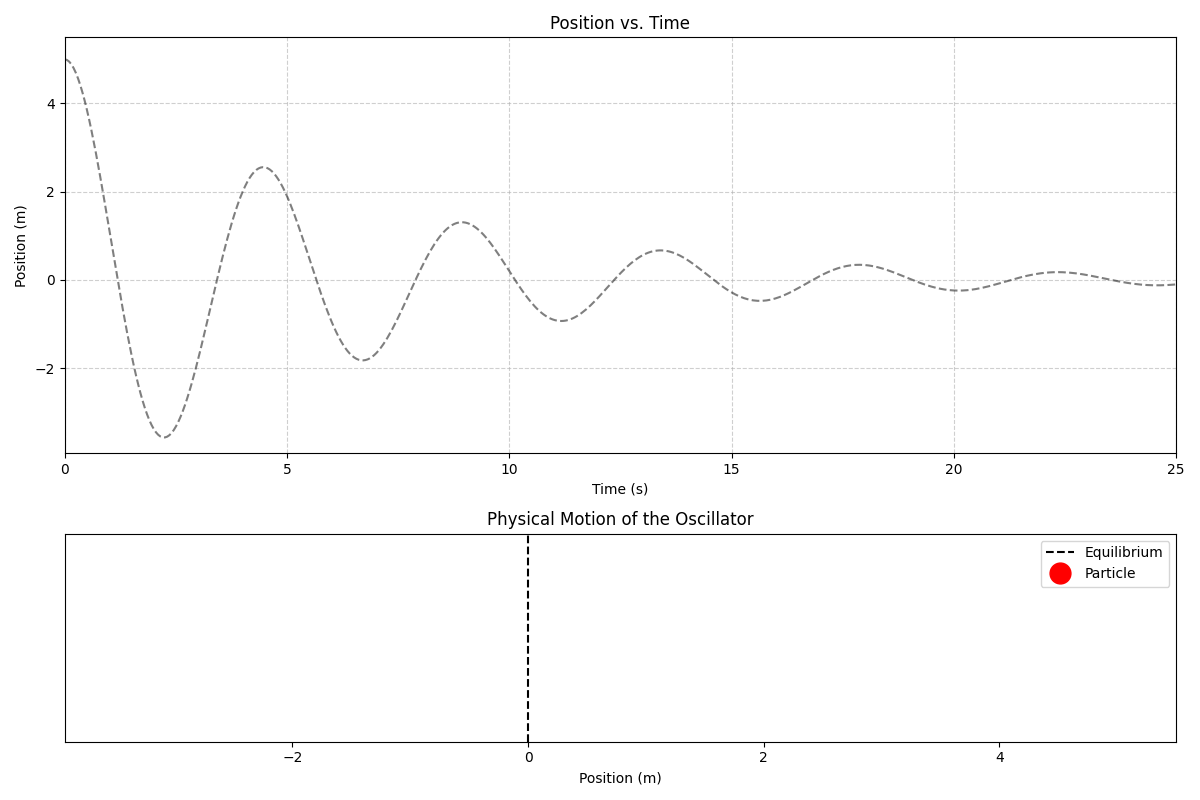

In [1]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# SciPy에서 초기값 문제(Initial Value Problem)를 푸는 함수를 임포트합니다.
from scipy.integrate import solve_ivp

# ==============================================================================
# 단계 2: 물리 시스템 및 시뮬레이션 파라미터 정의
# ------------------------------------------------------------------------------
# 물리 시스템의 상수 정의
m = 1.0  # 질량 (kg)
k = 2.0  # 용수철 상수 (N/m)
b = 0.3  # 감쇠 계수 (Ns/m)

# 시뮬레이션 시간 설정
t_start = 0
t_end = 25
num_points = 500
t_eval = np.linspace(t_start, t_end, num_points)

# 초기 조건: [초기 위치 x0, 초기 속도 v0]
initial_state = [5.0, 0.0]

# ==============================================================================
# 단계 3: 뉴턴 방정식 정의 (SciPy를 위한 함수 형태)
# ------------------------------------------------------------------------------
# solve_ivp는 1차 미분방정식 시스템을 풉니다.
# 따라서 2차 방정식(d²x/dt²)을 1차 연립 방정식으로 변환해야 합니다.
# 상태 벡터 S = [x, v] 라고 정의하면, dS/dt = [dx/dt, dv/dt] 입니다.
# 1. dx/dt = v
# 2. dv/dt = a = F/m = (-k*x - b*v) / m
# 이 두 식을 계산하여 반환하는 함수를 정의합니다.
# ------------------------------------------------------------------------------
def harmonic_oscillator_eq(t, state, m, k, b):
    """
    감쇠 조화 진동자의 1차 연립 미분방정식을 정의합니다.
    t: 시간 (solve_ivp에서 요구하는 인자)
    state: 상태 벡터 [x, v]
    m, k, b: 물리 상수
    """
    x, v = state  # 상태 벡터를 위치와 속도로 분해
    
    dxdt = v
    dvdt = (-k * x - b * v) / m
    
    return [dxdt, dvdt]

# ==============================================================================
# 단계 4: 미분방정식 풀이 (SciPy 실행)
# ------------------------------------------------------------------------------
# solve_ivp를 사용하여 t_eval에 지정된 시간 지점에서의 해를 구합니다.
# fun: 계산할 미분방정식 함수
# t_span: 시작과 끝 시간 [t_start, t_end]
# y0: 초기 조건 벡터
# t_eval: 해를 계산할 시간 지점들
# args: 미분방정식 함수에 전달할 추가 파라미터들
# ------------------------------------------------------------------------------
solution = solve_ivp(
    fun=harmonic_oscillator_eq,
    t_span=[t_start, t_end],
    y0=initial_state,
    t_eval=t_eval,
    args=(m, k, b)
)

# solution 객체에서 시간, 위치, 속도 데이터를 추출합니다.
t_result = solution.t
positions = solution.y[0]
velocities = solution.y[1]

# ==============================================================================
# 단계 5: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
# 2개의 서브플롯을 생성합니다: (상) 위치-시간 그래프, (하) 물리적 움직임
fig, (ax1, ax2) = plt.subplots(
    2, 1, 
    figsize=(12, 8), 
    gridspec_kw={'height_ratios': [2, 1]}
)

# 위치-시간 그래프(ax1)의 축 범위 설정
ax1.set_xlim(t_start, t_end)
ax1.set_ylim(np.min(positions) * 1.1, np.max(positions) * 1.1)

# 물리적 움직임(ax2)의 축 범위 설정
ax2.set_xlim(np.min(positions) * 1.1, np.max(positions) * 1.1)
ax2.set_ylim(-1, 1)
ax2.set_yticks([]) # y축 눈금은 필요 없음

# ==============================================================================
# 단계 6: 초기 프레임 시각화 (정적 및 애니메이션 요소)
# ------------------------------------------------------------------------------
# 1. ax1: 전체 궤적(회색 점선)과 현재 지점(붉은 점)
ax1.plot(t_result, positions, 'k--', alpha=0.5, label='Full Trajectory')
current_time_dot, = ax1.plot([], [], 'ro', markersize=8)

# 2. ax2: 평형점(검은 점선), 용수철(선), 입자(붉은 점)
ax2.axvline(0, color='black', linestyle='--', label='Equilibrium')
spring_line, = ax2.plot([], [], 'b-', lw=2)
particle, = ax2.plot([], [], 'ro', markersize=15, label='Particle')

# ==============================================================================
# 단계 7: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax1.set_title('Position vs. Time')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.set_title('Physical Motion of the Oscillator')
ax2.set_xlabel('Position (m)')
ax2.legend(loc='upper right')

fig.tight_layout()

# ==============================================================================
# 단계 8: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 그래프를 업데이트하는 함수
def update(frame):
    # 현재 프레임의 위치와 시간
    current_pos = positions[frame]
    current_time = t_result[frame]
    
    # ax1의 현재 시간 점 업데이트
    current_time_dot.set_data([current_time], [current_pos])
    
    # ax2의 용수철과 입자 위치 업데이트
    spring_line.set_data([0, current_pos], [0, 0])
    particle.set_data([current_pos], [0])
    
    return current_time_dot, spring_line, particle

# FuncAnimation 객체 생성
ani = FuncAnimation(
    fig, 
    update, 
    frames=num_points, 
    interval=20, 
    blit=True
)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 2. Hamiltonian Equation in Phase Space

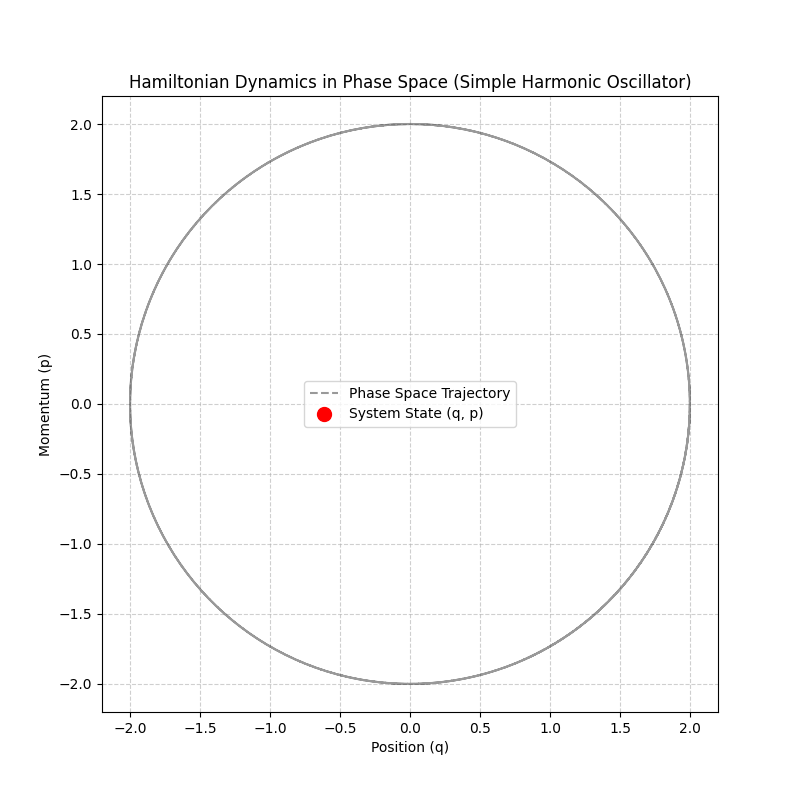

In [2]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# SciPy에서 초기값 문제(Initial Value Problem)를 푸는 함수를 임포트합니다.
from scipy.integrate import solve_ivp

# ==============================================================================
# 단계 2: 물리 시스템 및 시뮬레이션 파라미터 정의
# ------------------------------------------------------------------------------
# 물리 시스템의 상수 정의
m = 1.0  # 질량 (kg)
k = 1.0  # 용수철 상수 (N/m)

# 시뮬레이션 시간 설정
t_start = 0
t_end = 20
num_points = 500
t_eval = np.linspace(t_start, t_end, num_points)

# 초기 조건: [초기 위치 q0, 초기 운동량 p0]
# 에너지가 보존되므로, 초기 조건이 위상 공간에서의 궤적 모양을 결정합니다.
initial_state = [2.0, 0.0]  # (위치=2.0, 운동량=0에서 시작)

# ==============================================================================
# 단계 3: 해밀턴 방정식 정의 (SciPy를 위한 함수 형태)
# ------------------------------------------------------------------------------
# 해밀턴 방정식은 이미 1차 연립 미분방정식 형태이므로 변환이 필요 없습니다.
# 상태 벡터 S = [q, p] 이고, dS/dt = [dq/dt, dp/dt] 입니다.
# ------------------------------------------------------------------------------
def hamiltonian_eq(t, state, m, k):
    """
    단순 조화 진동자의 해밀턴 방정식을 정의합니다.
    t: 시간 (solve_ivp에서 요구하는 인자)
    state: 상태 벡터 [q, p]
    m, k: 물리 상수
    """
    q, p = state  # 상태 벡터를 좌표(q)와 운동량(p)으로 분해
    
    dqdt = p / m
    dpdt = -k * q
    
    return [dqdt, dpdt]

# ==============================================================================
# 단계 4: 미분방정식 풀이 (SciPy 실행)
# ------------------------------------------------------------------------------
# solve_ivp를 사용하여 t_eval에 지정된 시간 지점에서의 해를 구합니다.
# ------------------------------------------------------------------------------
solution = solve_ivp(
    fun=hamiltonian_eq,
    t_span=[t_start, t_end],
    y0=initial_state,
    t_eval=t_eval,
    args=(m, k)
)

# solution 객체에서 좌표(q)와 운동량(p) 데이터를 추출합니다.
q_result = solution.y[0]
p_result = solution.y[1]

# ==============================================================================
# 단계 5: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
# 위상 공간을 표현할 단일 플롯을 생성합니다.
fig, ax = plt.subplots(figsize=(8, 8))

# 위상 공간 궤적이 찌그러지지 않도록 가로, 세로 비율을 동일하게 설정합니다.
ax.set_aspect('equal', adjustable='box')

# 축 범위 설정
ax.set_xlim(np.min(q_result) * 1.1, np.max(q_result) * 1.1)
ax.set_ylim(np.min(p_result) * 1.1, np.max(p_result) * 1.1)

# ==============================================================================
# 단계 6: 초기 프레임 시각화 (정적 및 애니메이션 요소)
# ------------------------------------------------------------------------------
# 1. 위상 공간에서의 전체 궤적(에너지가 보존되므로 닫힌 타원 형태)
ax.plot(q_result, p_result, 'k--', alpha=0.4, label='Phase Space Trajectory')

# 2. 현재 시스템의 상태를 나타내는 점
state_point, = ax.plot([], [], 'ro', markersize=10, label='System State (q, p)')

# ==============================================================================
# 단계 7: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax.set_title('Hamiltonian Dynamics in Phase Space (Simple Harmonic Oscillator)')
ax.set_xlabel('Position (q)')
ax.set_ylabel('Momentum (p)')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# ==============================================================================
# 단계 8: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 위상 공간의 점을 업데이트하는 함수
def update(frame):
    # 현재 프레임의 위치(q)와 운동량(p)
    current_q = q_result[frame]
    current_p = p_result[frame]
    
    # 상태 점의 위치를 업데이트
    state_point.set_data([current_q], [current_p])
    
    return state_point,

# FuncAnimation 객체 생성
ani = FuncAnimation(
    fig, 
    update, 
    frames=num_points, 
    interval=20, 
    blit=True
)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 2. Hamiltonian Equation in Phase Space : Detailed

c:\Projects\data_analysis\venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


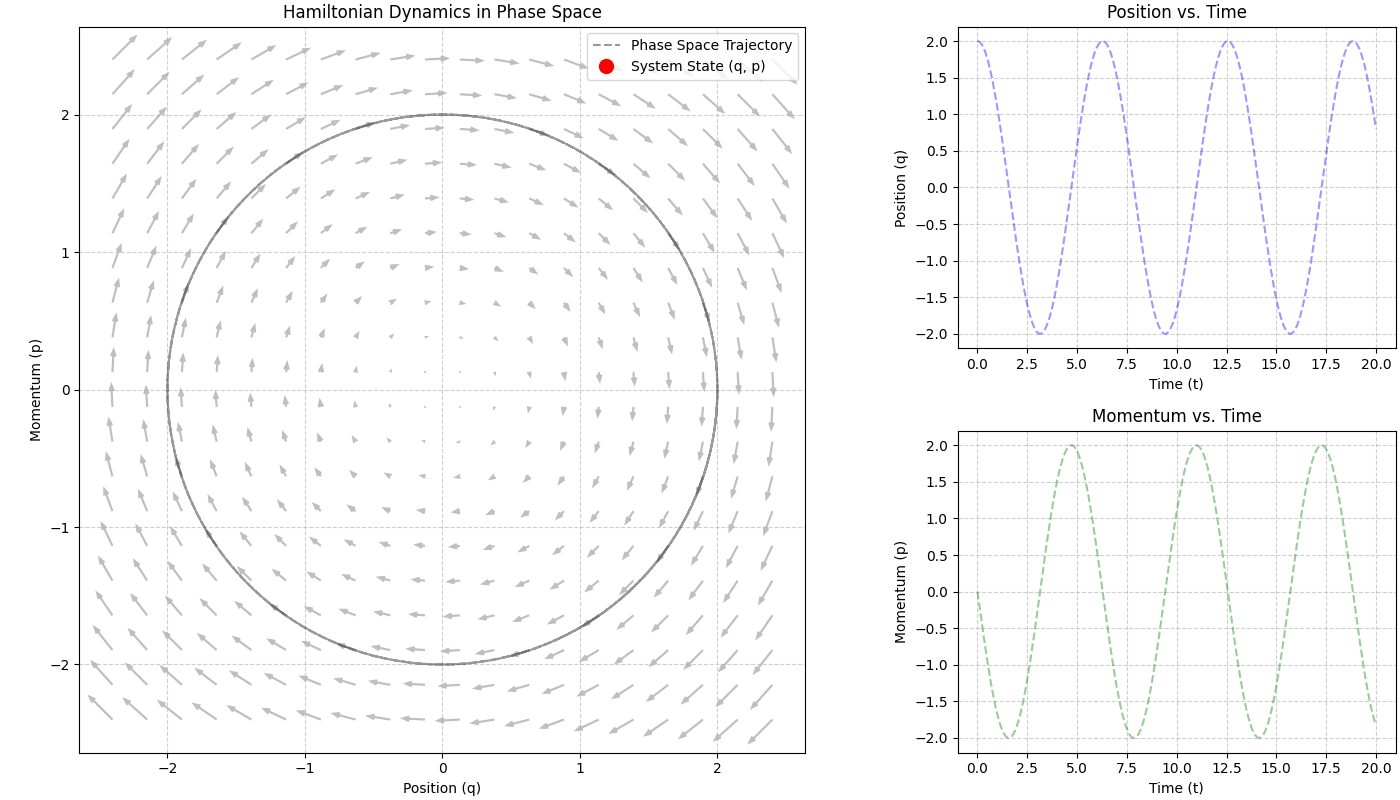

In [11]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# SciPy에서 초기값 문제(Initial Value Problem)를 푸는 함수를 임포트합니다.
from scipy.integrate import solve_ivp

# ==============================================================================
# 단계 2: 물리 시스템 및 시뮬레이션 파라미터 정의
# ------------------------------------------------------------------------------
# 물리 시스템의 상수 정의
m = 1.0  # 질량 (kg)
k = 1.0  # 용수철 상수 (N/m)

# 시뮬레이션 시간 설정
t_start = 0
t_end = 20
num_points = 500
t_eval = np.linspace(t_start, t_end, num_points)

# 초기 조건: [초기 위치 q0, 초기 운동량 p0]
initial_state = [2.0, 0.0]

# ==============================================================================
# 단계 3: 해밀턴 방정식 정의 (SciPy를 위한 함수 형태)
# ------------------------------------------------------------------------------
def hamiltonian_eq(t, state, m, k):
    q, p = state
    dqdt = p / m
    dpdt = -k * q
    return [dqdt, dpdt]

# ==============================================================================
# 단계 4: 미분방정식 풀이 (SciPy 실행)
# ------------------------------------------------------------------------------
solution = solve_ivp(
    fun=hamiltonian_eq,
    t_span=[t_start, t_end],
    y0=initial_state,
    t_eval=t_eval,
    args=(m, k)
)
# 결과 추출
t_result = solution.t
q_result = solution.y[0]
p_result = solution.y[1]

# ==============================================================================
# 단계 5: 시각화 준비 (복합 레이아웃 Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
# subplot_mosaic를 사용하여 복잡한 레이아웃을 쉽게 생성합니다.
# 'main' 영역이 'q_t'와 'p_t'보다 2배 넓게 설정됩니다.
fig, axd = plt.subplot_mosaic(
    [['main', 'q_t'],
     ['main', 'p_t']],
    figsize=(14, 8),
    layout='constrained', # 레이아웃 자동 조절
    width_ratios=[2, 1]
)
# 각 축 객체에 더 쉬운 이름 할당
ax_main = axd['main']
ax_q = axd['q_t']
ax_p = axd['p_t']

# 위상 공간(main)의 가로-세로 비율을 동일하게 설정
ax_main.set_aspect('equal', adjustable='box')

# ==============================================================================
# 단계 6: 초기 프레임 시각화 (정적 및 애니메이션 요소)
# ------------------------------------------------------------------------------
# 1. 메인 플롯 (위상 공간 + 벡터장)
# -- 벡터장 계산 --
q_lim = np.max(np.abs(q_result)) * 1.2
p_lim = np.max(np.abs(p_result)) * 1.2
Q, P = np.meshgrid(np.linspace(-q_lim, q_lim, 20), np.linspace(-p_lim, p_lim, 20))
dQdt, dPdt = hamiltonian_eq(0, [Q, P], m, k)

# -- 벡터장 그리기 --
ax_main.quiver(Q, P, dQdt, dPdt, color='gray', alpha=0.5, headwidth=3, headlength=4)

# -- 전체 궤적 그리기 --
ax_main.plot(q_result, p_result, 'k--', alpha=0.4, label='Phase Space Trajectory')

# -- 현재 상태 점 초기화 --
state_point, = ax_main.plot([], [], 'ro', markersize=10, label='System State (q, p)')

# 2. q vs t 플롯
ax_q.plot(t_result, q_result, 'b--', alpha=0.4)
q_dot, = ax_q.plot([], [], 'bo', markersize=8)

# 3. p vs t 플롯
ax_p.plot(t_result, p_result, 'g--', alpha=0.4)
p_dot, = ax_p.plot([], [], 'go', markersize=8)

# ==============================================================================
# 단계 7: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
# 메인 플롯
ax_main.set_title('Hamiltonian Dynamics in Phase Space')
ax_main.set_xlabel('Position (q)')
ax_main.set_ylabel('Momentum (p)')
ax_main.grid(True, linestyle='--', alpha=0.6)
ax_main.legend()

# q vs t 플롯
ax_q.set_title('Position vs. Time')
ax_q.set_xlabel('Time (t)')
ax_q.set_ylabel('Position (q)')
ax_q.grid(True, linestyle='--', alpha=0.6)

# p vs t 플롯
ax_p.set_title('Momentum vs. Time')
ax_p.set_xlabel('Time (t)')
ax_p.set_ylabel('Momentum (p)')
ax_p.grid(True, linestyle='--', alpha=0.6)

# ==============================================================================
# 단계 8: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 3개의 점을 모두 업데이트하는 함수
def update(frame):
    current_t = t_result[frame]
    current_q = q_result[frame]
    current_p = p_result[frame]
    
    # 메인 플롯의 상태 점 업데이트
    state_point.set_data([current_q], [current_p])
    
    # q vs t 플롯의 점 업데이트
    q_dot.set_data([current_t], [current_q])
    
    # p vs t 플롯의 점 업데이트
    p_dot.set_data([current_t], [current_p])
    
    return state_point, q_dot, p_dot

# FuncAnimation 객체 생성
ani = FuncAnimation(
    fig, 
    update, 
    frames=num_points, 
    interval=20, 
    blit=True
)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 2. Geodesic Equation : Sphere

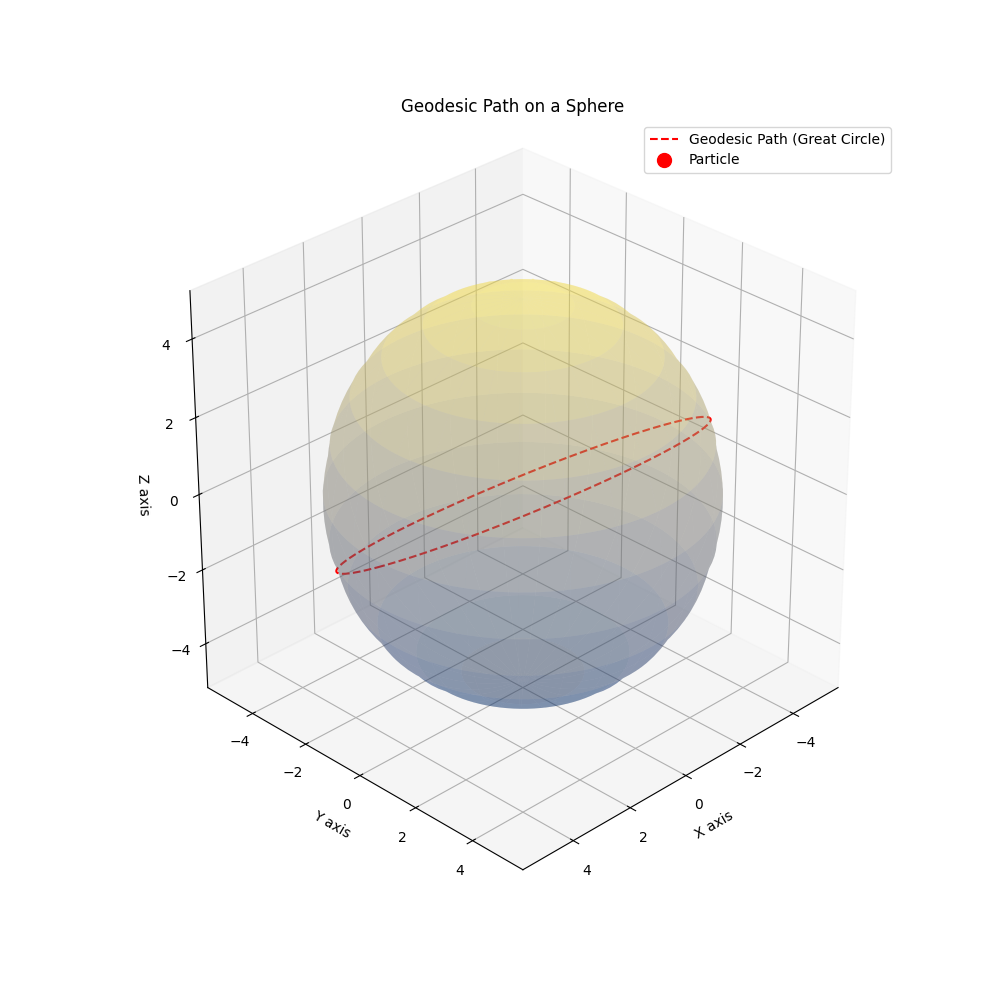

In [23]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# ==============================================================================
# 단계 2: 공간 및 시뮬레이션 파라미터 정의
# ==============================================================================
# 1. 시각화를 위한 구면 그리드 생성
radius = 5.0
u = np.linspace(0, 2 * np.pi, 100) # 경도 (Longitude)
v = np.linspace(0, np.pi, 50)   # 위도 (Latitude)
X = radius * np.outer(np.cos(u), np.sin(v))
Y = radius * np.outer(np.sin(u), np.sin(v))
Z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

# 2. 애니메이션 파라미터 설정
num_frames = 300
# 경로 파라미터 (0에서 2*pi까지 변하면 대원을 한 바퀴 돕니다)
tau = np.linspace(0, 2 * np.pi, num_frames)

# ==============================================================================
# 단계 3: 측지선 경로 정의 (기하학적 방법)
# ------------------------------------------------------------------------------
# 측지선(대원)은 구의 중심을 지나는 평면 위에 있습니다.
# 이 평면을 정의하기 위해 서로 수직인 두 개의 단위 벡터 u_vec, v_vec를 설정합니다.
# 입자는 이 평면 위에서 원운동을 하게 됩니다.
# ------------------------------------------------------------------------------
# 1. 초기 위치 벡터 (예: 적도 위의 한 점)
p0 = np.array([radius, 0, 0])

# 2. 초기 속도 벡터 (p0에서 구면에 접해야 함)
# 적도에서 북동쪽으로 특정 각도로 출발하는 속도를 설정합니다.
launch_angle = np.deg2rad(30) # 30도 각도로 발사
v0 = np.array([0, np.cos(launch_angle), np.sin(launch_angle)])

# 3. 대원 평면의 기저 벡터 생성
# u_vec은 초기 위치 방향
u_vec = p0 / np.linalg.norm(p0)
# v_vec은 초기 속도 방향
v_vec = v0 / np.linalg.norm(v0)

# 4. 시간에 따른 경로 계산
# Path(τ) = R * (cos(τ)*u_vec + sin(τ)*v_vec)
x_path = radius * (np.cos(tau) * u_vec[0] + np.sin(tau) * v_vec[0])
y_path = radius * (np.cos(tau) * u_vec[1] + np.sin(tau) * v_vec[1])
z_path = radius * (np.cos(tau) * u_vec[2] + np.sin(tau) * v_vec[2])

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 3D Axes 객체 생성)
# ==============================================================================
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1]) # 정비율로 구가 찌그러지지 않게 함

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (정적 및 애니메이션 요소)
# ==============================================================================
# 1. 반투명한 구면 그리기
ax.plot_surface(X, Y, Z, cmap='cividis', alpha=0.3, rstride=4, cstride=4)

# 2. 계산된 전체 측지선 경로를 점선으로 미리 그리기
ax.plot(x_path, y_path, z_path, 'r--', label='Geodesic Path (Great Circle)')

# 3. 경로를 따라 움직이는 입자 객체 초기화
particle, = ax.plot([], [], [], 'ro', markersize=10, label='Particle')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 시야각 등)
# ==============================================================================
ax.set_title("Geodesic Path on a Sphere")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
ax.view_init(elev=30, azim=45)

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ==============================================================================
def update(frame):
    # 현재 프레임의 입자 위치
    current_x = x_path[frame]
    current_y = y_path[frame]
    current_z = z_path[frame]
    
    # 입자 객체의 3D 위치 업데이트
    particle.set_data([current_x], [current_y])
    particle.set_3d_properties([current_z])
    
    return particle,

ani = FuncAnimation(fig, update, frames=num_frames, interval=20, blit=True)
plt.show()

#### 2. Geodesic Equation : Paraboloid Surface

- SciPy의 solve_ivp로 풀 수 있기에 여기에서 서술함

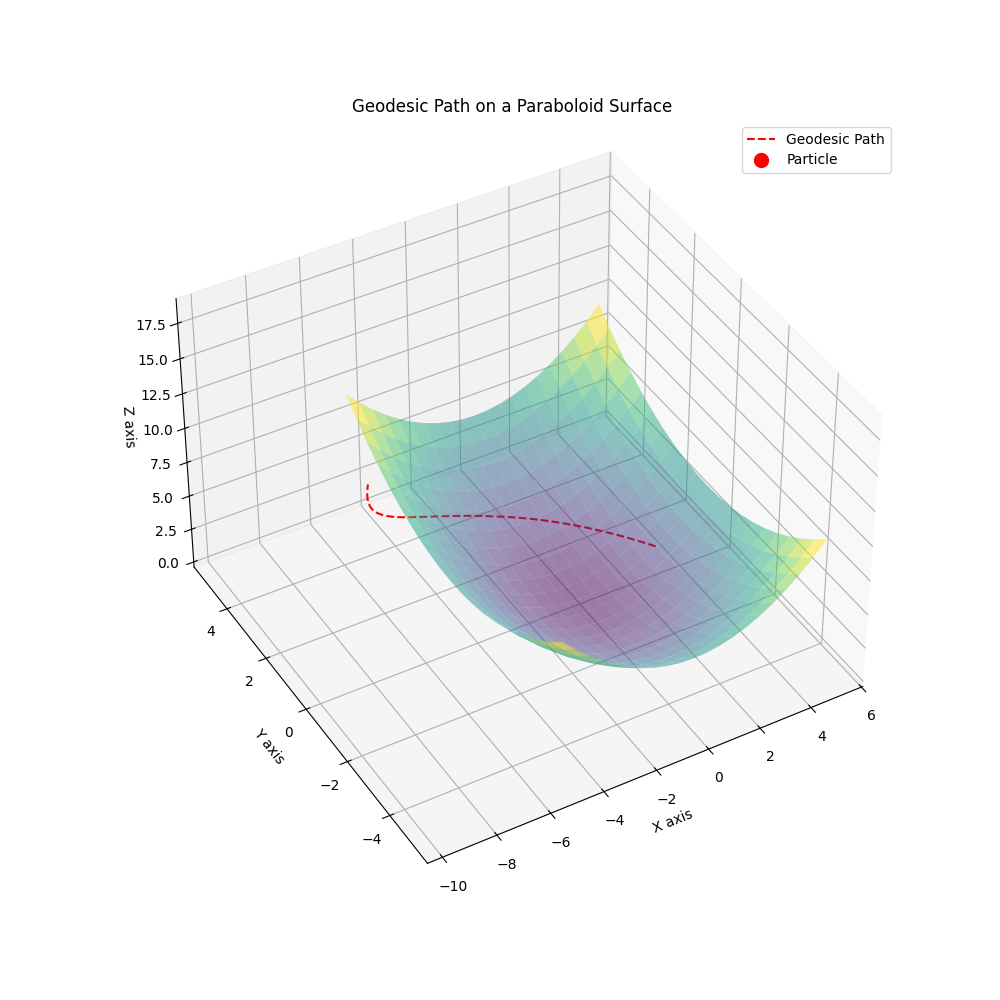

In [22]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# ==============================================================================
# 단계 2: 곡면 및 시뮬레이션 파라미터 정의
# ==============================================================================
# 1. 곡면을 정의하는 함수 z = f(x, y)
# 여기서는 포물면(paraboloid)을 사용합니다.
def surface_func(x, y):
    return 0.2 * (x**2 + y**2)

# 2. 시각화를 위한 3D 공간 그리드 생성
x_grid = np.arange(-5, 5.5, 0.5)
y_grid = np.arange(-5, 5.5, 0.5)
X, Y = np.meshgrid(x_grid, y_grid)
Z = surface_func(X, Y)

# 3. 시뮬레이션 시간 설정
t_start = 0
t_end = 20
num_points = 500
t_eval = np.linspace(t_start, t_end, num_points)

# 4. 초기 조건
# 초기 위치 (x0, y0)
x0, y0 = 3.0, 0.0
# 초기 속도 (vx0, vy0). 이 벡터는 곡면에 접해야 합니다.
vx0, vy0 = -0.5, 1.0
initial_state = [x0, y0, vx0, vy0]

# ==============================================================================
# 단계 3: 측지선 방정식 정의 (SciPy를 위한 함수 형태)
# ------------------------------------------------------------------------------
# 상태 벡터 S = [x, y, vx, vy] (vx=dx/dt, vy=dy/dt)
# dS/dt = [vx, vy, ax, ay] 를 반환하는 함수를 정의합니다.
# 가속도(ax, ay)는 크리스토펠 기호로부터 계산됩니다.
# ------------------------------------------------------------------------------
def geodesic_eq(t, state):
    x, y, vx, vy = state
    
    # 곡면 z=f(x,y)의 1차, 2차 편미분을 계산합니다.
    # f(x,y) = 0.2*(x²+y²)
    fx = 0.4 * x  # ∂f/∂x
    fy = 0.4 * y  # ∂f/∂y
    fxx = 0.4     # ∂²f/∂x²
    fxy = 0.0     # ∂²f/∂x∂y
    fyy = 0.4     # ∂²f/∂y²

    # 분모에 해당하는 공통 항
    common_denominator = 1 + fx**2 + fy**2
    
    # 크리스토펠 기호가 포함된 가속도 항 계산
    # ax = -Γ^x_{αβ} * v^α * v^β
    # ay = -Γ^y_{αβ} * v^α * v^β
    common_numerator = fxx*vx**2 + 2*fxy*vx*vy + fyy*vy**2
    ax = -(fx * common_numerator) / common_denominator
    ay = -(fy * common_numerator) / common_denominator
    
    return [vx, vy, ax, ay]

# ==============================================================================
# 단계 4: 미분방정식 풀이 (SciPy 실행)
# ==============================================================================
solution = solve_ivp(
    fun=geodesic_eq,
    t_span=[t_start, t_end],
    y0=initial_state,
    t_eval=t_eval
)

# 결과 추출
x_path = solution.y[0]
y_path = solution.y[1]
# 3D 경로를 위해 z좌표 계산
z_path = surface_func(x_path, y_path)

# ==============================================================================
# 단계 5: 시각화 준비 (Figure 및 3D Axes 객체 생성)
# ==============================================================================
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 0.7]) # z축 비율을 조절하여 보기 좋게 만듦

# ==============================================================================
# 단계 6: 초기 프레임 시각화 (정적 및 애니메이션 요소)
# ==============================================================================
# 1. 반투명한 곡면 그리기
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, rstride=1, cstride=1)

# 2. 계산된 전체 측지선 경로를 점선으로 미리 그리기
ax.plot(x_path, y_path, z_path, 'r--', label='Geodesic Path')

# 3. 경로를 따라 움직이는 입자 객체 초기화
particle, = ax.plot([], [], [], 'ro', markersize=10, label='Particle')

# ==============================================================================
# 단계 7: 그래프 꾸미기 (레이블, 타이틀, 시야각 등)
# ==============================================================================
ax.set_title("Geodesic Path on a Paraboloid Surface")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
ax.view_init(elev=40, azim=-120)

# ==============================================================================
# 단계 8: 애니메이션 정의 및 최종 출력
# ==============================================================================
def update(frame):
    # 현재 프레임의 입자 위치
    current_x = x_path[frame]
    current_y = y_path[frame]
    current_z = z_path[frame]
    
    # 입자 객체의 3D 위치 업데이트
    particle.set_data([current_x], [current_y])
    particle.set_3d_properties([current_z])
    
    return particle,

ani = FuncAnimation(fig, update, frames=num_points, interval=20, blit=True)
plt.show()

#### 3. Maxwell Equation in 1D

- SciPy의 solve_ivp가 ODE를 푸는 도구인 반면 PDE인 맥스웰 방정식은 DTD(Finite-Difference Time-Domain)를 이용해 직접 구현해해야 한다.

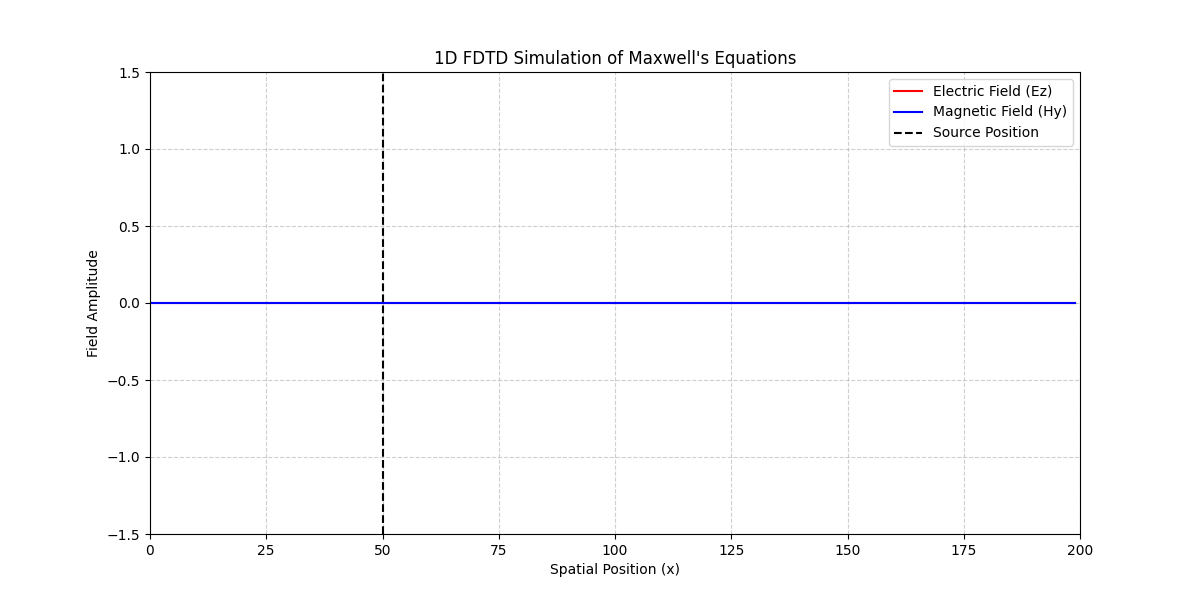

In [4]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 공간 정의
# ------------------------------------------------------------------------------
# 시뮬레이션 공간 설정
grid_size = 200  # 공간 격자의 크기
x_axis = np.arange(grid_size)

# FDTD 파라미터 (Courant 안정성 조건을 만족하도록 설정)
# 단순화를 위해 진공에서의 빛의 속도 c=1로 가정합니다. (c=dx/dt)
dx = 1.0
dt = 0.5  # dt <= dx/c 이어야 안정적입니다.

# 시뮬레이션 시간 설정
num_steps = 500

# 소스(Source) 파라미터: 파동을 발생시키는 지점
source_pos = grid_size // 4  # 공간의 1/4 지점
source_freq = 0.05  # 소스의 진동 주파수

# ==============================================================================
# 단계 3: 필드 초기화
# ------------------------------------------------------------------------------
# 1차원 공간에 대한 전기장(Ez)과 자기장(Hy) 배열을 생성합니다.
# 모든 지점의 초기 필드 값은 0으로 설정합니다.
Ez = np.zeros(grid_size)
Hy = np.zeros(grid_size)

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# 축 범위 설정
ax.set_xlim(0, grid_size)
ax.set_ylim(-1.5, 1.5)

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ------------------------------------------------------------------------------
# 전기장(Ez)과 자기장(Hy)을 그릴 선 객체를 초기화합니다.
line_Ez, = ax.plot(x_axis, Ez, 'r-', label='Electric Field (Ez)')
line_Hy, = ax.plot(x_axis, Hy, 'b-', label='Magnetic Field (Hy)')

# 파동 소스의 위치를 표시
ax.axvline(source_pos, color='k', linestyle='--', label='Source Position')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax.set_title("1D FDTD Simulation of Maxwell's Equations")
ax.set_xlabel('Spatial Position (x)')
ax.set_ylabel('Field Amplitude')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 FDTD 알고리즘을 한 스텝 실행하고 그래프를 업데이트하는 함수
def update(frame):
    # --- FDTD Leapfrog Algorithm ---
    
    # 1. 자기장(Hy) 업데이트 (전체 공간)
    # Hy(t + dt/2) = Hy(t - dt/2) + (dt/μ) * (Ez(x+1) - Ez(x))/dx
    # μ=1, dx=1 이라고 가정하여 단순화합니다.
    Hy[:-1] += dt * (Ez[1:] - Ez[:-1])
    
    # 2. 전기장(Ez) 업데이트 (전체 공간)
    # Ez(t + dt) = Ez(t) + (dt/ε) * (Hy(x) - Hy(x-1))/dx
    # ε=1, dx=1 이라고 가정하여 단순화합니다.
    Ez[1:] += dt * (Hy[1:] - Hy[:-1])
    
    # 3. 소스(Source) 주입
    # 특정 지점에 시간에 따라 변하는 전기장을 인가하여 파동을 생성합니다.
    t = frame
    source_wave = np.sin(2 * np.pi * source_freq * t * dt)
    Ez[source_pos] += source_wave
    
    # 4. 경계 조건 (Boundary Conditions)
    # 가장 간단한 반사 경계 (Perfect Electric Conductor, PEC)
    # 공간의 양 끝에서 전기장을 항상 0으로 설정합니다.
    Ez[0] = 0
    Ez[-1] = 0
    
    # --- 그래프 업데이트 ---
    line_Ez.set_ydata(Ez)
    line_Hy.set_ydata(Hy)
    
    return line_Ez, line_Hy

# FuncAnimation 객체 생성
ani = FuncAnimation(
    fig, 
    update, 
    frames=num_steps, 
    interval=20, 
    blit=True
)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 3. Maxwell Equation in 2D

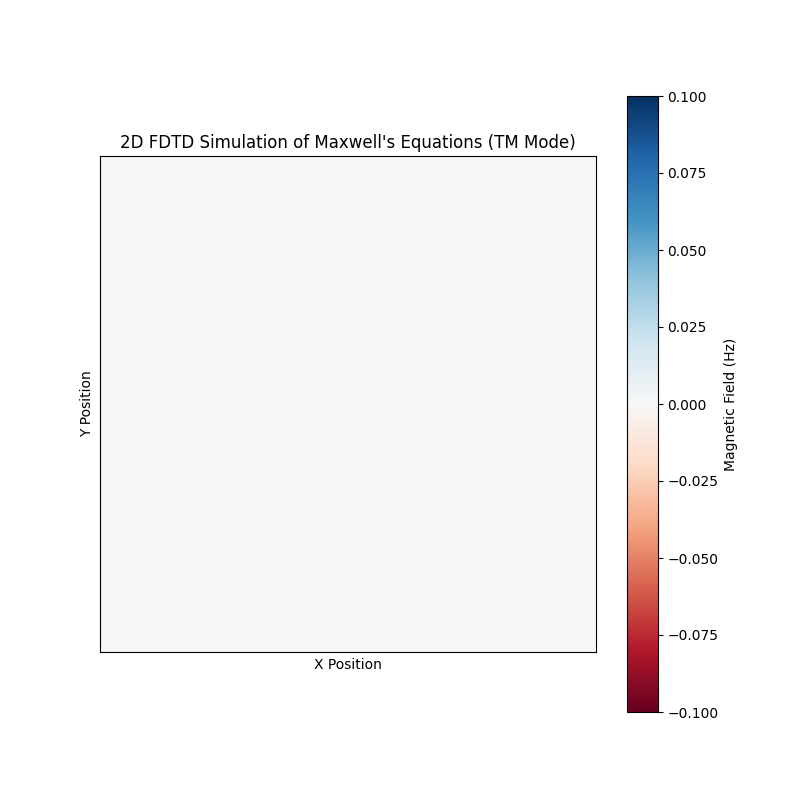

In [5]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 공간 정의
# ------------------------------------------------------------------------------
# 시뮬레이션 공간 격자 크기
grid_size_x = 150
grid_size_y = 150

# FDTD 파라미터 (Courant 안정성 조건을 만족해야 함)
# 빛의 속도 c=1, dx=1, dy=1 로 가정하여 단순화
# 2D에서 안정 조건은 dt <= 1 / sqrt(2) 입니다.
dt = 0.5

# 시뮬레이션 시간 설정
num_steps = 400

# 소스(Source) 파라미터: 중앙 지점에서 펄스를 발생시킴
source_pos_x = grid_size_x // 2
source_pos_y = grid_size_y // 2
source_freq = 0.08
source_peak_time = 1 / source_freq  # 펄스의 피크 시간

# ==============================================================================
# 단계 3: 필드 초기화
# ------------------------------------------------------------------------------
# 2차원 공간에 대한 전기장(Ex, Ey)과 자기장(Hz) 배열을 생성합니다.
Ex = np.zeros((grid_size_x, grid_size_y))
Ey = np.zeros((grid_size_x, grid_size_y))
Hz = np.zeros((grid_size_x, grid_size_y))

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# 축 범위 설정 및 가로-세로 비율 고정
ax.set_xlim(0, grid_size_x)
ax.set_ylim(0, grid_size_y)
ax.set_aspect('equal')

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ------------------------------------------------------------------------------
# 2D 필드를 색상으로 표시하기 위해 imshow를 사용합니다.
# Hz 필드를 시각화 대상으로 선택합니다.
# vmin/vmax를 고정하여 애니메이션 중 색상 스케일이 변하지 않도록 합니다.
im = ax.imshow(Hz.T, cmap='RdBu', vmin=-0.1, vmax=0.1, origin='lower')

# 컬러바 추가
fig.colorbar(im, ax=ax, label='Magnetic Field (Hz)')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀 등)
# ------------------------------------------------------------------------------
ax.set_title("2D FDTD Simulation of Maxwell's Equations (TM Mode)")
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
# 축 눈금을 제거하여 더 깔끔하게 보이도록 합니다.
ax.set_xticks([])
ax.set_yticks([])

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 FDTD 알고리즘을 한 스텝 실행하고 그래프를 업데이트하는 함수
def update(frame):
    # --- FDTD Leapfrog Algorithm (TM Mode) ---
    # (μ=1, ε=1, dx=1, dy=1 로 가정하여 단순화)

    # 1. 전기장(Ex, Ey) 업데이트
    # Ex(t + dt/2) = Ex(t - dt/2) + dt * ∂Hz/∂y
    Ex[:, 1:] += dt * (Hz[:, 1:] - Hz[:, :-1])
    # Ey(t + dt/2) = Ey(t - dt/2) - dt * ∂Hz/∂x
    Ey[1:, :] -= dt * (Hz[1:, :] - Hz[:-1, :])

    # 2. 자기장(Hz) 업데이트
    # Hz(t + dt) = Hz(t) - dt * (∂Ey/∂x - ∂Ex/∂y)
    Hz[1:-1, 1:-1] -= dt * (
        (Ey[2:, 1:-1] - Ey[1:-1, 1:-1]) - (Ex[1:-1, 2:] - Ex[1:-1, 1:-1])
    )

    # 3. 소스(Source) 주입: 리커 웨이블릿(Ricker wavelet) 펄스
    t = frame * dt
    t_eff = t - source_peak_time
    arg = (np.pi * source_freq * t_eff)**2
    source_pulse = (1 - 2 * arg) * np.exp(-arg)
    # 중앙 지점의 Hz 필드에 펄스를 더해줍니다.
    Hz[source_pos_x, source_pos_y] += source_pulse

    # 4. 경계 조건 (Perfect Electric Conductor, PEC)
    # 공간의 경계에서 접선 방향 전기장(tangential E-field)을 0으로 설정합니다.
    Ex[:, 0] = Ex[:, -1] = 0
    Ey[0, :] = Ey[-1, :] = 0

    # --- 그래프 업데이트 ---
    # imshow 객체의 데이터만 새로운 Hz 필드로 교체합니다.
    im.set_data(Hz.T) # .T를 사용하여 y축이 위로 가도록 합니다.
    
    return im,

# FuncAnimation 객체 생성
ani = FuncAnimation(
    fig, 
    update, 
    frames=num_steps, 
    interval=20, 
    blit=True
)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 4. Heat Equation

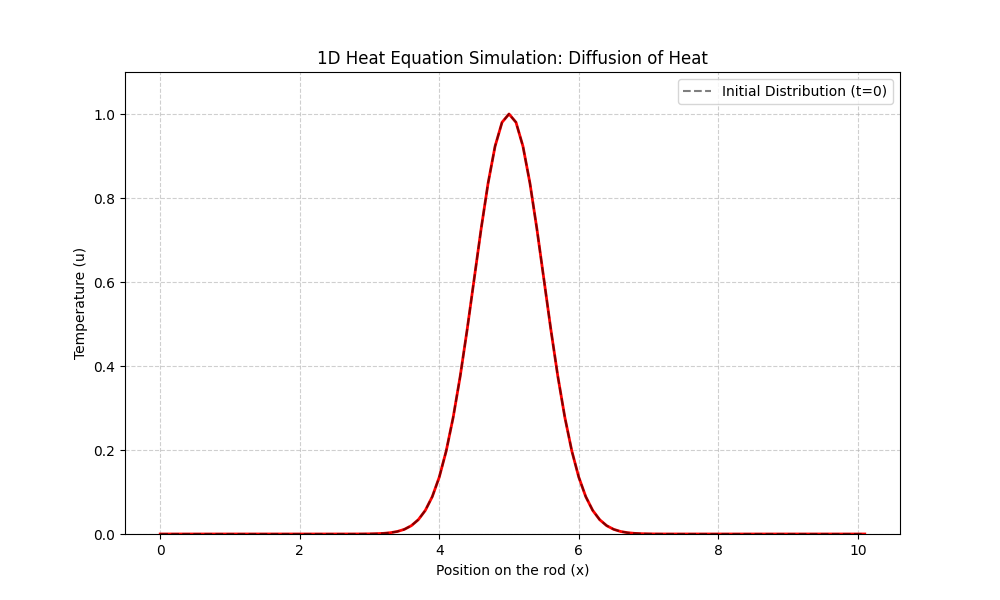

In [15]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 공간 정의
# ------------------------------------------------------------------------------
# 시뮬레이션 공간(1차원 막대) 설정
grid_size = 101  # 공간 격자점의 수 (홀수로 설정하여 중앙점을 명확히 함)
dx = 0.1         # 공간 격자 간격
x_axis = np.arange(0, grid_size * dx, dx)

# 시뮬레이션 시간 설정
num_steps = 2000 # 전체 시뮬레이션 스텝 수
dt = 0.0002      # 시간 간격 (안정성을 위해 작게 설정)

# 물리 상수
alpha = 1.0      # 열확산율

# ==============================================================================
# 단계 3: 초기 조건 정의
# ------------------------------------------------------------------------------
# 시간 t=0 에서의 온도 분포 u(x, 0)를 정의합니다.
# 막대의 중앙에 가우시안 형태의 '뜨거운 점'을 생성합니다.
u = np.zeros(grid_size)
center_pos = (grid_size // 2) * dx
u = np.exp(-((x_axis - center_pos)**2) / 0.5)

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0, 1.1)

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ------------------------------------------------------------------------------
# 시간에 따른 온도 분포를 그릴 선 객체를 초기화합니다.
line, = ax.plot(x_axis, u, 'r-', lw=2)
# 초기 분포를 점선으로 남겨두어 변화를 비교할 수 있게 합니다.
ax.plot(x_axis, u, 'k--', alpha=0.5, label='Initial Distribution (t=0)')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax.set_title("1D Heat Equation Simulation: Diffusion of Heat")
ax.set_xlabel("Position on the rod (x)")
ax.set_ylabel("Temperature (u)")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 유한 차분법으로 열방정식을 풀고 그래프를 업데이트하는 함수
def update(frame):
    global u
    # u의 복사본을 만들어 다음 시간 스텝의 온도를 계산합니다.
    u_new = u.copy()
    
    # 내부 격자점들에 대해 유한 차분법을 적용합니다.
    # ∂u/∂t ≈ (u_new - u) / dt
    # ∂²u/∂x² ≈ (u[i+1] - 2*u[i] + u[i-1]) / dx²
    # 이를 정리하면 u_new[i]에 대한 업데이트 식이 나옵니다.
    for i in range(1, grid_size - 1):
        laplacian = (u[i+1] - 2*u[i] + u[i-1]) / dx**2
        u_new[i] = u[i] + alpha * dt * laplacian
    
    # 경계 조건 (Boundary Conditions): 막대의 양 끝 온도를 0으로 고정 (Dirichlet)
    u_new[0] = 0
    u_new[-1] = 0
    
    # 계산된 새 분포로 업데이트합니다.
    u = u_new
    
    # 그래프 데이터를 업데이트합니다.
    line.set_ydata(u)
    
    return line,

# FuncAnimation 객체 생성
ani = FuncAnimation(fig, update, frames=num_steps, interval=10, blit=True, repeat=False)
plt.show()

#### 4. Fokker-Planck Equation

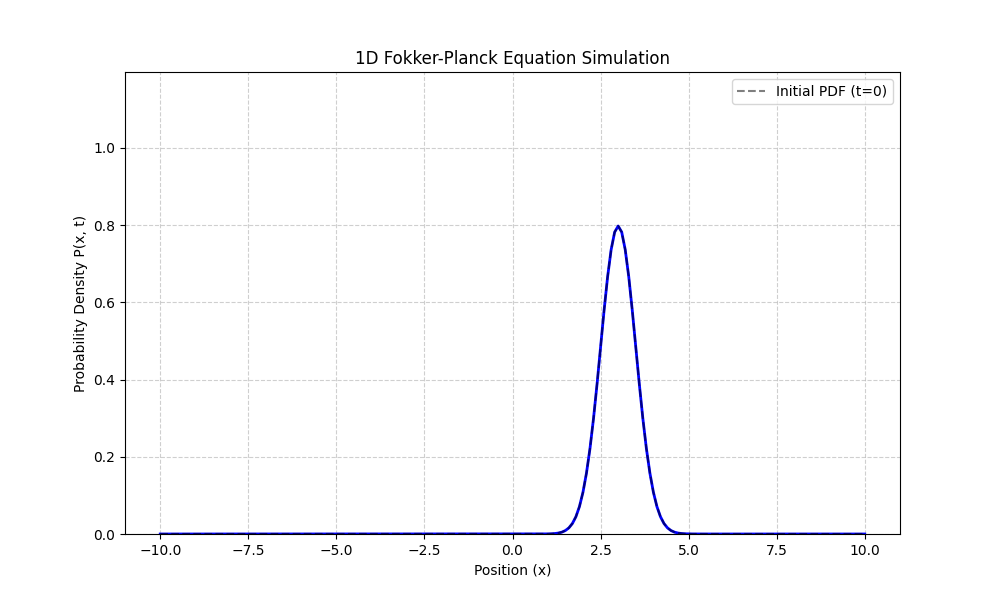

In [7]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 공간 정의
# ==============================================================================
# 시뮬레이션 공간 설정
grid_size = 201
dx = 0.1
x_axis = np.linspace(-10, 10, grid_size)

# 시뮬레이션 시간 설정
num_steps = 1000
dt = 0.001

# 물리 상수 (드리프트와 확산 계수)
# 조화 진동자 포텐셜 V(x) = 0.5*k*x^2 에서 드리프트 A(x) = -k*x
k = 1.0 
drift_A = -k * x_axis
# 확산 계수 D (상수로 가정)
diffusion_B = 0.5

# ==============================================================================
# 단계 3: 초기 조건 정의
# ==============================================================================
# 시간 t=0 에서의 확률 밀도 함수 P(x, 0)
# 중심이 3.0이고 표준편차가 작은 가우시안 분포로 시작
P = np.exp(-((x_axis - 3.0)**2) / 0.5)
P /= np.sum(P) * dx # 전체 확률이 1이 되도록 정규화

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0, np.max(P) * 1.5)

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ==============================================================================
line, = ax.plot(x_axis, P, 'b-', lw=2)
ax.plot(x_axis, P, 'k--', alpha=0.5, label='Initial PDF (t=0)')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ==============================================================================
ax.set_title("1D Fokker-Planck Equation Simulation")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density P(x, t)")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ==============================================================================
# 각 프레임마다 호출되어 포커-플랑크 방정식을 풀고 그래프를 업데이트하는 함수
def update(frame):
    global P
    P_new = P.copy()
    
    # 내부 격자점들에 대해 유한 차분법을 적용
    for i in range(1, grid_size - 1):
        # 드리프트 항: -∂/∂x [A(x)P]
        # 중앙 차분법: (f[i+1] - f[i-1]) / (2*dx)
        flux_A = drift_A * P
        drift_term = -(flux_A[i+1] - flux_A[i-1]) / (2 * dx)
        
        # 확산 항: ∂²/∂x² [B(x)P] (B는 상수)
        # 중앙 차분법: (f[i+1] - 2*f[i] + f[i-1]) / dx²
        flux_B = diffusion_B * P
        diffusion_term = (flux_B[i+1] - 2*flux_B[i] + flux_B[i-1]) / dx**2
        
        P_new[i] = P[i] + dt * (drift_term + diffusion_term)
        
    # 경계 조건: 확률이 경계를 벗어나지 않도록 설정 (Reflecting boundary)
    P_new[0] = P_new[1]
    P_new[-1] = P_new[-2]
    
    # 확률 보존을 위해 매 스텝마다 재정규화
    P = P_new / (np.sum(P_new) * dx)
    
    line.set_ydata(P)
    return line,

# FuncAnimation 객체 생성
ani = FuncAnimation(fig, update, frames=num_steps, interval=10, blit=True, repeat=False)
plt.show()

#### 5. Schrödinger Equation

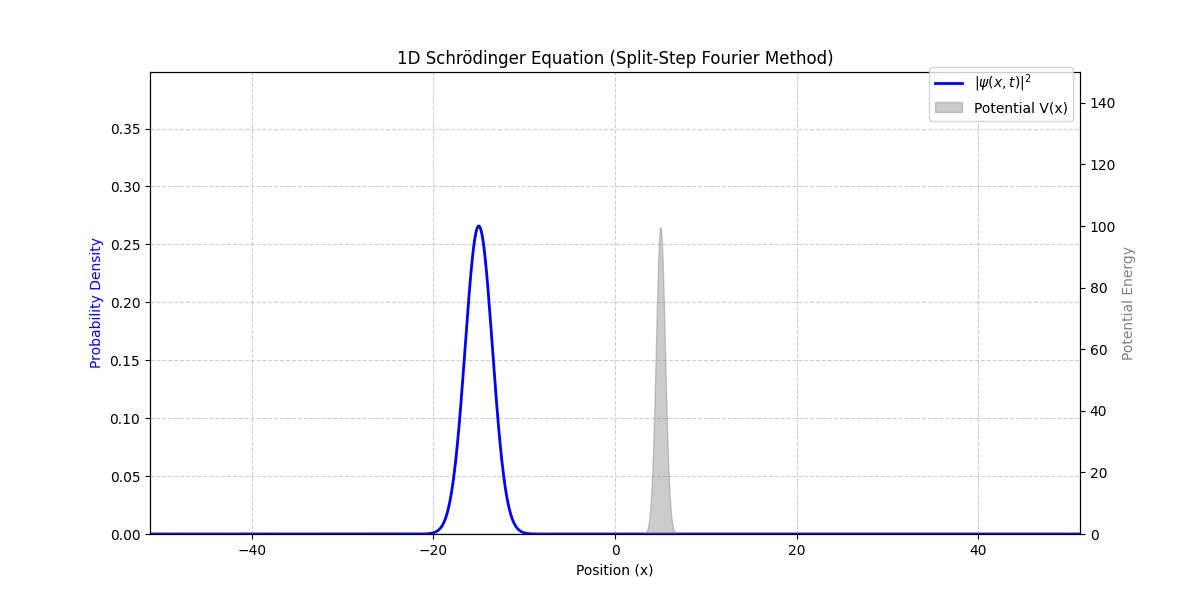

In [17]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 고속 푸리에 변환(FFT)을 위한 함수를 임포트합니다.
from scipy.fft import fft, ifft, fftfreq

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 공간 정의
# ==============================================================================
# 시뮬레이션 공간 설정
grid_size = 1024  # FFT는 2의 거듭제곱일 때 가장 효율적입니다.
dx = 0.1
x_axis = np.linspace(-grid_size*dx/2, grid_size*dx/2, grid_size)

# 운동량 공간(k-space) 설정
# fftfreq는 FFT에 사용될 주파수(운동량) 격자를 생성해 줍니다.
k_axis = fftfreq(grid_size, d=dx) * 2 * np.pi

# 시뮬레이션 시간 설정
num_steps = 1000
# 이전보다 훨씬 큰 dt를 사용해도 안정적입니다.
dt = 0.02

# 물리 상수 (단순화를 위해 1로 설정)
hbar = 1.0
m = 1.0

# 포텐셜 V(x) 정의
potential = np.zeros(grid_size)
barrier_height = 100.0
barrier_width = 0.5
barrier_pos = 5.0
potential = barrier_height * np.exp(-((x_axis - barrier_pos)**2) / (2 * barrier_width**2))

# ==============================================================================
# 단계 3: 초기 조건 정의 (파동함수 생성)
# ==============================================================================
x0 = -15.0
p0 = 15.0
sigma = 1.5
psi = (1/(2*np.pi*sigma**2)**0.25) * \
      np.exp(-(x_axis - x0)**2 / (4 * sigma**2)) * \
      np.exp(1j * p0 * x_axis)

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ==============================================================================
prob_density = np.abs(psi)**2
line, = ax.plot(x_axis, prob_density, 'b-', lw=2, label=r'$|\psi(x,t)|^2$')
ax2.fill_between(x_axis, 0, potential, color='gray', alpha=0.4, label='Potential V(x)')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ==============================================================================
ax.set_title("1D Schrödinger Equation (Split-Step Fourier Method)")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density", color='blue')
ax2.set_ylabel("Potential Energy", color='gray')
ax.set_xlim(x_axis[0], x_axis[-1])
ax.set_ylim(0, np.max(prob_density) * 1.5)
ax2.set_ylim(0, barrier_height * 1.5)
ax.grid(True, linestyle='--', alpha=0.6)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력 (Split-Step Fourier Method)
# ------------------------------------------------------------------------------
# 분할 시간 방법을 위한 연산자(Operator)를 미리 계산해 둡니다.
# 1. 위치에너지 연산자
V_operator = np.exp(-1j * potential * dt / (2 * hbar))
# 2. 운동에너지 연산자 (운동량 공간에서)
# T = p²/2m = (ħk)²/2m
T_operator = np.exp(-1j * (hbar * k_axis)**2 * dt / (2 * m * hbar))

def update(frame):
    global psi
    
    # --- Split-Step Fourier Method ---
    # 1. 위치에너지 부분 적용 (dt/2 만큼)
    psi = V_operator * psi
    
    # 2. 운동에너지 부분 적용 (dt 만큼)
    # 2a. 운동량 공간으로 푸리에 변환
    psi_k = fft(psi)
    # 2b. 운동에너지 연산자 적용
    psi_k = T_operator * psi_k
    # 2c. 다시 실 공간으로 역 푸리에 변환
    psi = ifft(psi_k)
    
    # 3. 위치에너지 부분 다시 적용 (나머지 dt/2 만큼)
    # (2차 정확도를 위한 Strang Splitting)
    psi = V_operator * psi
    
    # 그래프 데이터 업데이트
    prob_density = np.abs(psi)**2
    line.set_ydata(prob_density)
    
    return line,

ani = FuncAnimation(fig, update, frames=num_steps, interval=10, blit=True, repeat=False)
plt.show()

#### 5. QFT: Klein-Gordon Equation

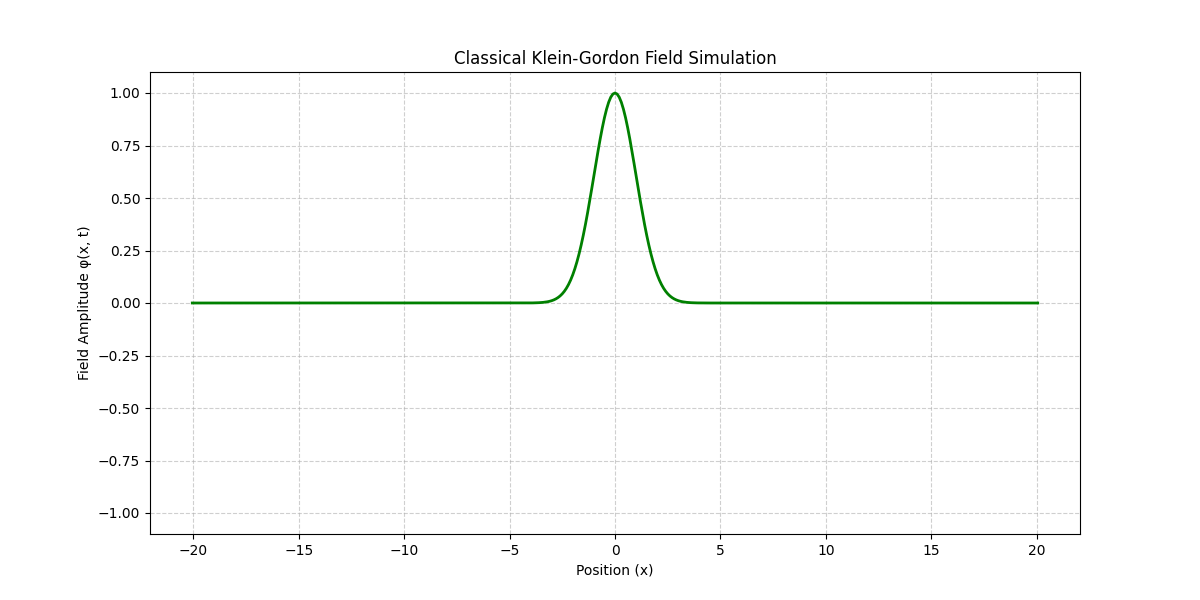

In [20]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 공간 정의
# ==============================================================================
# 시뮬레이션 공간 설정
grid_size = 401
dx = 0.1
x_axis = np.linspace(-grid_size*dx/2, grid_size*dx/2, grid_size)

# 시뮬레이션 시간 설정
num_steps = 1000
dt = 0.05

# 물리 상수 (단순화를 위해 c=1, hbar=1 로 설정)
c = 1.0
mass = 0.2  # 장에 해당하는 입자의 질량

# ==============================================================================
# 단계 3: 초기 조건 정의 (필드 초기화)
# ==============================================================================
# 클라인-고든 방정식은 2차 시간 미분이므로, 현재와 이전 시간 스텝의 필드가 필요
phi_current = np.zeros(grid_size)
phi_previous = np.zeros(grid_size)

# 중앙에 가우시안 펄스를 가하여 장을 초기에 들뜨게 함
phi_current = np.exp(-(x_axis**2) / 2.0)
phi_previous = phi_current.copy() # 초기 속도는 0으로 가정

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(-1.1, 1.1)

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ==============================================================================
line, = ax.plot(x_axis, phi_current, 'g-', lw=2)

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ==============================================================================
ax.set_title("Classical Klein-Gordon Field Simulation")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Field Amplitude φ(x, t)")
ax.grid(True, linestyle='--', alpha=0.6)

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ==============================================================================
def update(frame):
    global phi_current, phi_previous
    
    # 유한 차분법을 위한 2차 공간 미분 (라플라시안)
    laplacian = (phi_current[2:] - 2*phi_current[1:-1] + phi_current[:-2]) / dx**2
    
    # 클라인-고든 방정식 업데이트 (내부 격자점)
    # ∂²φ/∂t² ≈ (phi_next - 2*phi_current + phi_previous) / dt²
    phi_next = np.zeros_like(phi_current)
    phi_next[1:-1] = (2*phi_current[1:-1] - phi_previous[1:-1] +
                      (c*dt/dx)**2 * (phi_current[2:] - 2*phi_current[1:-1] + phi_current[:-2]) -
                      (mass*c**2*dt)**2 * phi_current[1:-1])

    # 경계 조건 (Dirichlet, 양 끝을 0으로 고정)
    phi_next[0] = 0
    phi_next[-1] = 0

    # 시간 스텝 업데이트
    phi_previous = phi_current.copy()
    phi_current = phi_next.copy()
    
    # 그래프 데이터 업데이트
    line.set_ydata(phi_current)
    
    return line,

ani = FuncAnimation(fig, update, frames=num_steps, interval=10, blit=True, repeat=False)
plt.show()